Accessing the data from the pdf file

In [ ]:
import pdfplumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:


def extract_tables_from_pdf(pdf_path):
    tables = []
    
    with pdfplumber.open(pdf_path) as pdf:
        # Iterating over all pages in the PDF
        for page_number in range(len(pdf.pages)):
            page = pdf.pages[page_number]
            
            # Extract tables from the current page
            page_tables = page.extract_tables()
            
            # Add tables from the current page to the overall list
            tables.extend(page_tables)
    
    return tables


pdf_path = r"C:\Users\shri\Downloads\\Walmart-10k-Reports-Optimized.pdf"
tables = extract_tables_from_pdf(pdf_path)

for i, table in enumerate(tables):
    print(f"Table {i + 1}:")
    for row in table:
        print(row)
    print("\n")


Table 1:
['']
['Annual Report']
['']


Table 2:
['n', '4,600', 'pickup locations and more than', '3,900']


Table 3:
['Supercenters (general merchandise and grocery) 69,000 260,000 178,000']
['Discount stores (general merchandise and limited grocery) 30,000 206,000 105,000']
['Neighborhood markets(1) (grocery) 28,000 65,000 42,000']


Table 4:
['n', '3,900', 's']


Table 5:
['Annual Membership Fee $110 $50']
['Number of Add-on Memberships ($45 each) Up to 16 Up to 8']


Table 6:
['needs of our customer and community stakeholder groups, including', 'by providing', 'safer, healthier and more affordable']
['food and other products, disaster support, associate volunteerism, local grant programs and community cohesion', None, None]
['initiatives.', None, None]


Table 7:
['We periodically publish information on our ESG priorities, strategies, and progress on our corporate website and may update', None, None]
['those disclosures from time to time. Nothing on our website, including our ESG re

As Result we get the all tables present in that pdf and now we are going to access the table which is we wanted the table data is in the form of lists

In [2]:
target_table_index = 36
if 0 <= target_table_index < len(tables):
   
    target_table = tables[target_table_index]
    print("Specified Table:")
    for row in target_table:
        print(row)
else:
    print(f"Error: Invalid table index {target_table_index}")


Specified Table:
['Revenues:']
['Net sales $ 605,881 $ 567,762 $ 555,233']
['Membership and other income 5,408 4,992 3,918']
['Total revenues 611,289 572,754 559,151']
['Costs and expenses:']
['Cost of sales 463,721 429,000 420,315']
['Operating, selling, general and administrative expenses 127,140 117,812 116,288']
['Operating income 20,428 25,942 22,548']
['Interest:']
['Debt 1,787 1,674 1,976']
['Finance lease 341 320 339']
['Interest income (254) (158) (121)']
['Interest, net 1,874 1,836 2,194']
['Loss on extinguishment of debt — 2,410 —']
['Other (gains) and losses 1,538 3,000 (210)']
['Income before income taxes 17,016 18,696 20,564']
['Provision for income taxes 5,724 4,756 6,858']
['Consolidated net income 11,292 13,940 13,706']
['Consolidated net (income) loss attributable to noncontrolling interest 388 (267) (196)']
['Consolidated net income attributable to Walmart $ 11,680 $ 13,673 $ 13,510']
['']
['Net income per common share:']
['Basic net income per common share attributa

After accessing   the required table now its time to convert the data from lists to csv because csv files are easy to access and use

In [19]:
specified_table = target_table 
csv_file_path = 'output_table.csv'

# Writing  the data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for row in specified_table:
        csv_writer.writerow(row)

print(f"CSV file '{csv_file_path}' created successfully.")


CSV file 'output_table.csv' created successfully.


After executing the above cell the output_table.csv file will be generated 

Now its time to import the output_table.csv file for the analysis

In [8]:
file_path = r'C:\Users\shri\Documents\walmart_table_54_data_final.csv'  # Replace with the actual file path
df = pd.read_csv(file_path, index_col=0)

df

,2021,2022,2023
Metric,,,
Net Sales,"$555,233","$567,762","$605,881"
Membership and Other Income,"$3,918","$4,992","$5,408"
Total Revenues,"$559,151","$572,754","$611,289"
Cost of Sales,"$420,315","$429,000","$463,721"
Operating Expenses,"$116,288","$117,812","$127,140"
Operating Income,"$22,548","$25,942","$20,428"
Interest Debt,"$1,976","$1,674","$1,787"
Finance Lease,$339,$320,$341
Interest Income,$121,$158,$254


Here we can see the formatted data

From here we are going to start the analysis although there is no huge amount of data we will try to analyse and  find the insights

In [10]:
# Extract and analyze net sales
net_sales = df.loc['Net Sales']
net_sales = net_sales.str.replace('$', '').str.replace(',', '').astype(float)  # Remove commas and convert to numeric

# Calculate year-to-year change in net sales
net_sales_change = net_sales.pct_change() * 100  # Calculate percentage change

# Display the results
print("Net Sales Analysis:")
print(net_sales.to_frame(name='Net Sales ($)'))
print("\nYear-to-Year Change in Net Sales (%):")
print(net_sales_change.to_frame(name='Net Sales Change in % '))


Net Sales Analysis:
      Net Sales ($)
2021       555233.0
2022       567762.0
2023       605881.0

Year-to-Year Change in Net Sales (%):
      Net Sales Change in % 
2021                     NaN
2022                2.256530
2023                6.713905


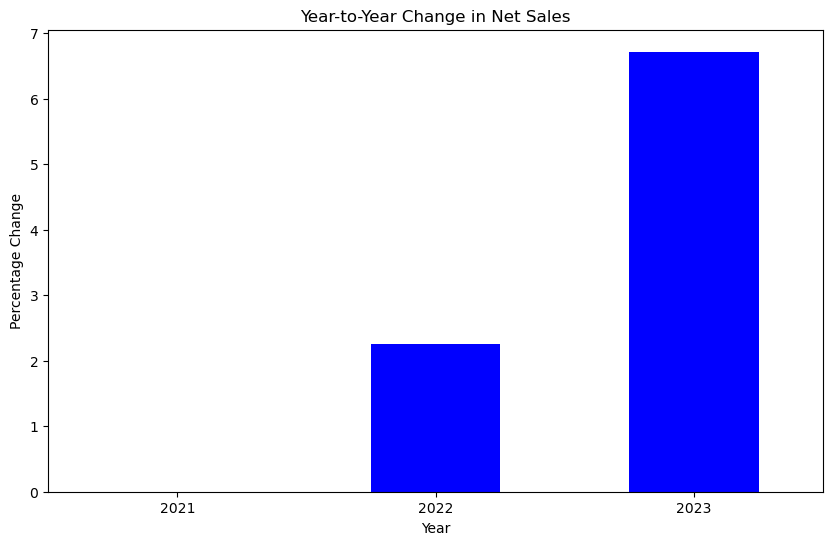

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
net_sales_change.plot(kind='bar', color='blue')
plt.title('Year-to-Year Change in Net Sales')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=0)
plt.show()


Year-to-Year Change in Total Revenues:
      Percentage
2021         NaN
2022    2.432795
2023    6.728019


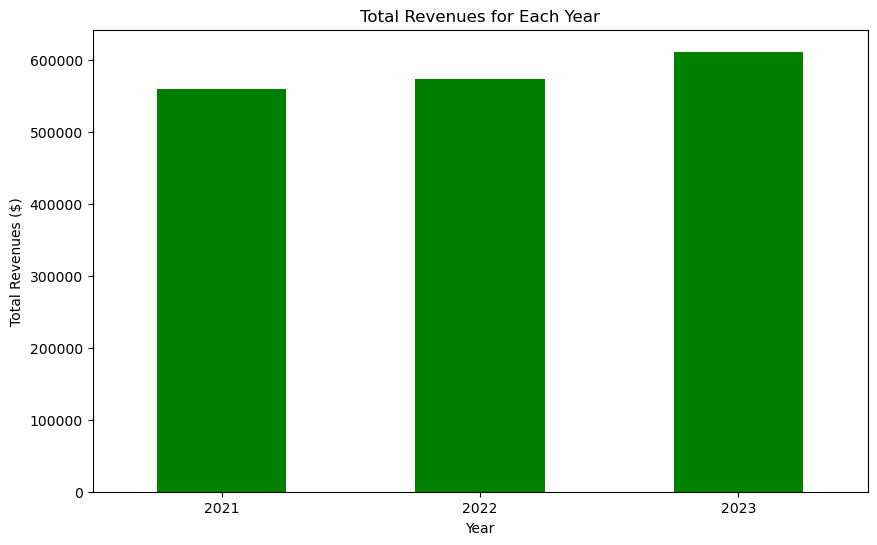

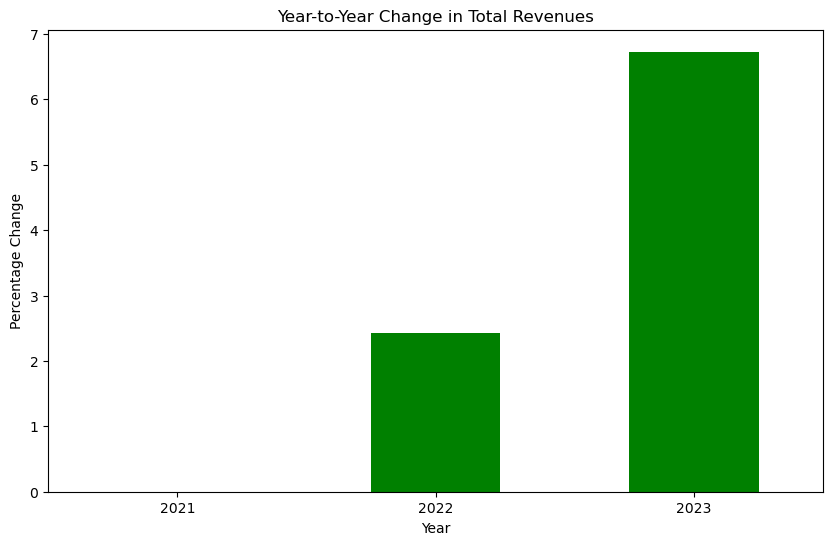

In [16]:
# Extract and analyze total revenues
total_revenues = df.loc['Total Revenues']
total_revenues = total_revenues.str.replace('$', '').str.replace(',', '').astype(float)

# Calculate year-to-year change in total revenues
total_revenues_change = total_revenues.pct_change() * 100 

print("Year-to-Year Change in Total Revenues:")
print(total_revenues_change.to_frame(name='Percentage'))

# Plot the results
plt.figure(figsize=(10, 6))
total_revenues.plot(kind='bar', color='green')

plt.title('Total Revenues for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Revenues ($)')
plt.xticks(rotation=0)
plt.show()

# Plot the results
plt.figure(figsize=(10, 6))
total_revenues_change.plot(kind='bar', color='green')

plt.title('Year-to-Year Change in Total Revenues')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=0)
plt.show()



Year-to-Year Changes in Debt:
      Debt Change  Debt Percentage Change
2021          NaN                     NaN
2022       -302.0              -15.283401
2023        113.0                6.750299


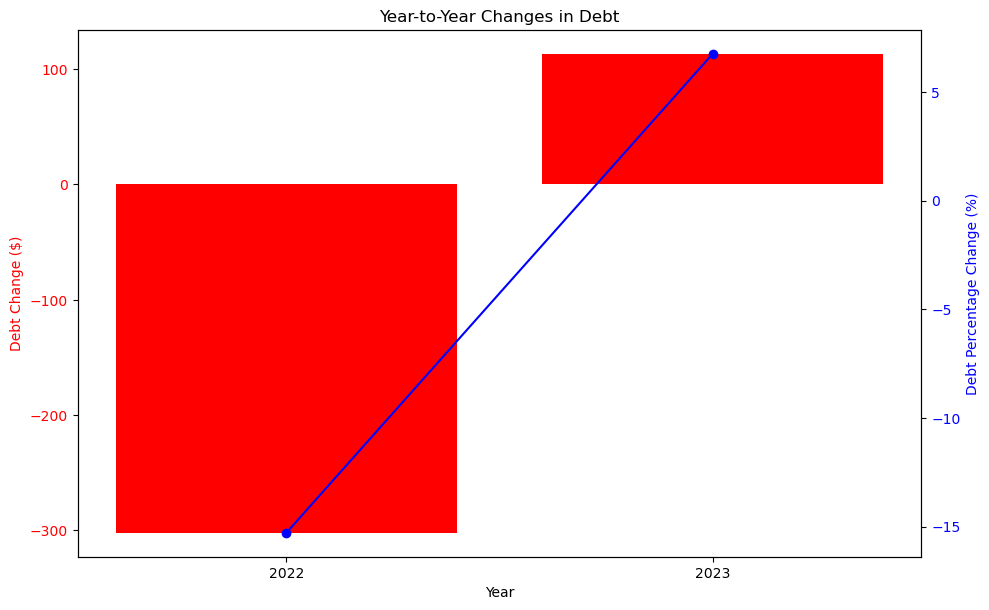

In [17]:
# Extract debt
debt = df.loc['Interest Debt']
debt = debt.str.replace('$', '').str.replace(',', '').astype(float) 

# Calculate year-to-year change in debt
debt_change = debt.diff() 
debt_percentage_change = debt.pct_change() * 100  
# Displaying the results
result_df = pd.DataFrame({
    'Debt Change': debt_change,
    'Debt Percentage Change': debt_percentage_change
})
print("Year-to-Year Changes in Debt:")
print(result_df)


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(result_df.index, result_df['Debt Change'], color='red', label='Debt Change ($)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Debt Change ($)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(result_df.index, result_df['Debt Percentage Change'], color='blue', label='Debt Percentage Change (%)', marker='o')
ax2.set_ylabel('Debt Percentage Change (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Year-to-Year Changes in Debt')
plt.show()

Year-to-Year Percentage Change in Interest Net:
      Interest Net Percentage Change
2021                             NaN
2022                      -16.317229
2023                        2.069717


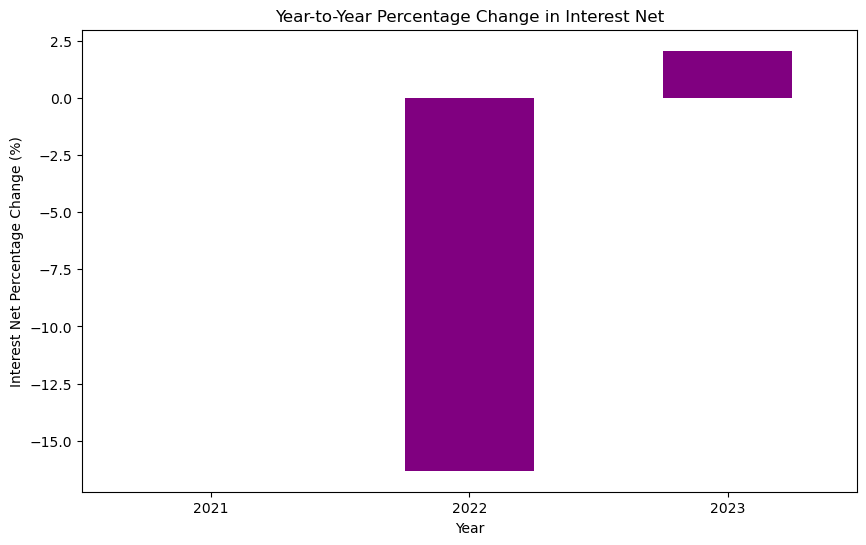

In [18]:
interest_net = df.loc['Interest Net']
interest_net = interest_net.str.replace('$', '').str.replace(',', '').astype(float)  

# Calculate year-to-year percentage change in interest net
interest_net_percentage_change = interest_net.pct_change() * 100


result_df = pd.DataFrame({
    'Interest Net Percentage Change': interest_net_percentage_change
})
print("Year-to-Year Percentage Change in Interest Net:")
print(result_df)


plt.figure(figsize=(10, 6))
interest_net_percentage_change.plot(kind='bar', color='purple')
plt.title('Year-to-Year Percentage Change in Interest Net')
plt.xlabel('Year')
plt.ylabel('Interest Net Percentage Change (%)')
plt.xticks(rotation=0)
plt.show()